# Временные ряды  ВВП Ганы

## Задания для проекта

Итак, здесь вы начинаете работу над своим небольшим проектом. Напоминаем — работать нужно с данными по ВВП Ганы. Выполняйте все задания проекта в одном Jupyter-ноутбуке.

1. Прочитайте исходный файл с данными. Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.

Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.

2. Постройте график скользящего среднего, проанализируйте результат. Для построения MA используйте метод rolling(), который принимает в качестве параметра размер окна. 
Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.

Пример: train_df.spx.rolling(window=2).mean().

Визуализируйте исходный временной ряд и построенный с помощью скользящего среднего прогноз, сравните графики между собой и сделайте выводы.

3. С помощью теста Дики-Фуллера оцените стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA.

Примечание. Если ваш ряд является нестационарным, дифференцируйте его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда 
к стационарному, будет вашим параметром d для модели ARIMA.

Параметры p и q выберите по коррелограммам ACF и PACF.

Примечание. Помните, что параметры p и q для ARMA/ARIMA определяются из коррелограмм стационарного ряда. То есть, если ваш изначальный временной ряд не являлся 
стационарным, то коррелограммы строятся для разностей того порядка, которые являются стационарными.

Постройте модель ARMA/ARIMA для прогнозирования поведения временного ряда.

Также постройте несколько моделей с параметрами, ближайшими к найденным p и q, и сравните коэффициент AIC (или подберите наилучшие параметры с помощью пакета pmdarima, 
как в скринкасте).

4. Постройте модель с наилучшими параметрами и выполните предсказание для отложенной тестовой выборки (последние три года).

5. Отобразите результат графически — постройте графики истинного и предсказанного поведения временного ряда, а также 95%-ый доверительный интервал для прогноза.

6. Сделайте выводы по полученным результатам.

Прочитайте исходный файл с данными

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline 

from datetime import datetime


In [19]:
data = pd.read_csv("data/ghana_gdp.csv", parse_dates=["year"], index_col=["year"])

display(data.head())
print(data)

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


            GDP (current US$)
year                         
1960-01-01       1.217087e+09
1961-01-01       0.000000e+00
1962-01-01       1.382353e+09
1963-01-01       1.540616e+09
1964-01-01       1.731092e+09
...                       ...
2017-01-01       6.040638e+10
2018-01-01       6.729928e+10
2019-01-01       6.833754e+10
2020-01-01       7.004320e+10
2021-01-01       7.759428e+10

[62 rows x 1 columns]


Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.

<Axes: xlabel='year'>

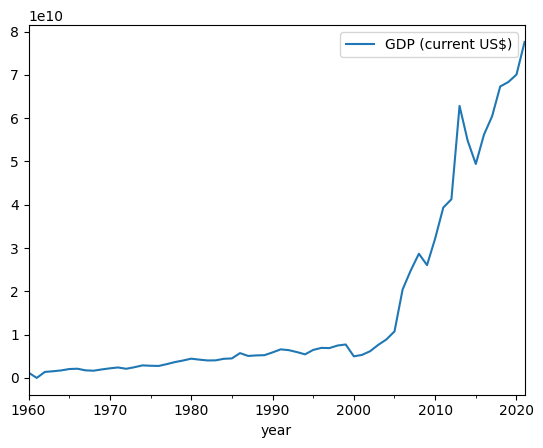

In [ ]:
# # Визуализация временного ряда
data.plot()

Проанализируйте временной ряд на наличие тренда и сезонности.

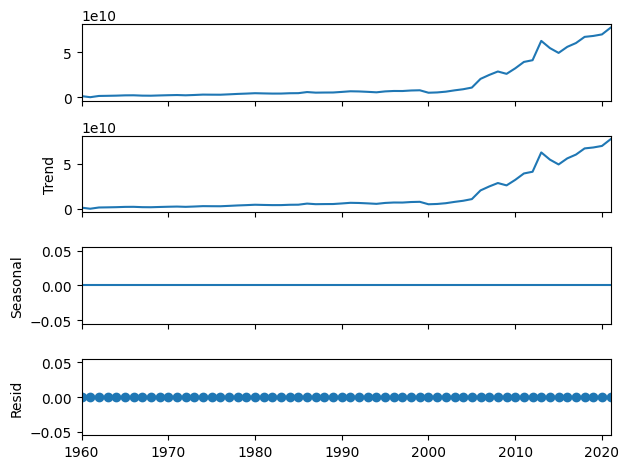

In [21]:
decomposition = seasonal_decompose(data, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

# первичные выводы о присутствии компонент тренда и сезонности в ряде.

Судя по предоставленной диаграмме декомпозиции временного ряда, можно сделать следующие первичные выводы:

1. Общий тренд: 
   - На графике тренда видно, что данные ВВП Ганы имеют выраженный восходящий тренд. Это говорит о том, что с течением времени ВВП страны увеличивается.

2. Сезонность: 
   - График сезонности плоский и близок к нулю. Это указывает на отсутствие выраженных сезонных колебаний в данных. Это может быть вызвано тем, что период данных не подходит для выявления сезонности или же, действительно, сезонность отсутствует.

3. Остатки (Resid): 
   - График остатков показывает небольшие расхождения от нуля. Это соответствует незначительным колебаниям данных, которые не объясняются трендом или сезонностью.

Ваш анализ показывает, что основное поведение данных объясняется трендом, а сезонные изменения практически отсутствуют. Если нужны более детальные выводы или анализ, рекомендуем проверить характеристики данных (например, частоту наблюдений) и, возможно, попробовать использовать мультипликативную модель вместо аддитивной, если ваши данные имеют более сложные отношения между компонентами.

Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.

In [22]:
# Делим исходный временной ряд на тренировочную и тестовую выборки
train_data = data.iloc[:len(data)-3]  # Все данные, кроме последних трех наблюдений
test_data = data.iloc[len(data)-3:]   # Последние три наблюдения для теста

# Проверим размер данных
print("Размер тренировочной выборки:", len(train_data))
print("Размер тестовой выборки:", len(test_data))


Размер тренировочной выборки: 59
Размер тестовой выборки: 3


Постройте график скользящего среднего, проанализируйте результат. Для построения MA используйте метод rolling(), который принимает в качестве параметра размер окна. Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.

Пример:train_df.spx.rolling(window=2).mean().


Визуализируйте исходный временной ряд и построенный с помощью скользящего среднего прогноз, сравните графики между собой и сделайте выводы.

In [ ]:
# Чтобы избежать подобных ошибок, рекомендуется сначала проверить имеющиеся столбцы в датафрейме
print(train_data.columns)

Index(['GDP (current US$)'], dtype='object')


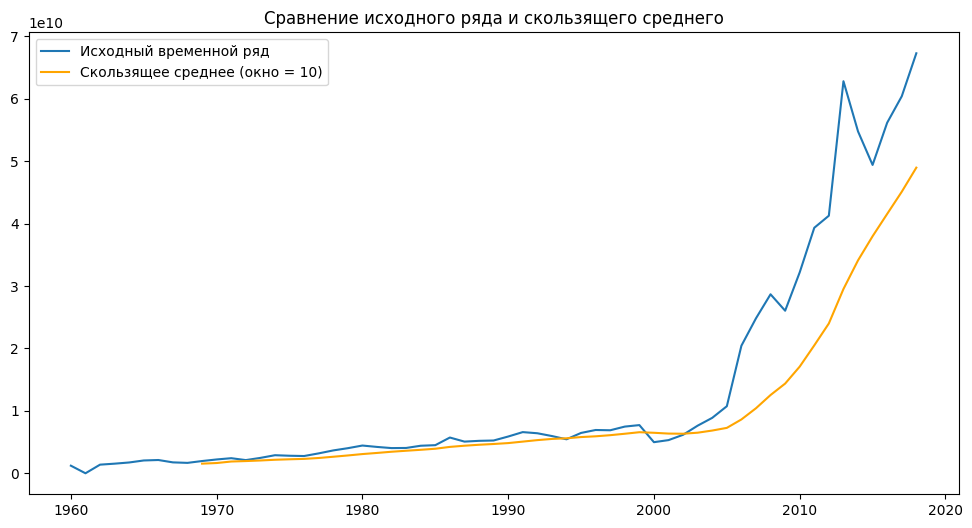

In [31]:
# Построение скользящего среднего с окном в 10
rolling_mean = train_data['GDP (current US$)'].rolling(window=10).mean()

# Визуализируем исходный временной ряд и скользящее среднее
plt.figure(figsize=(12, 6))
plt.plot(train_data['GDP (current US$)'], label='Исходный временной ряд')
plt.plot(rolling_mean, label='Скользящее среднее (окно = 10)', color='orange')
plt.legend()
plt.title('Сравнение исходного ряда и скользящего среднего')
plt.show()

На графике представлены два временных ряда:

1. Исходный временной ряд (синий график) — показывает значения данных с их полной волатильностью и колебаниями.
2. Скользящее среднее (оранжевый график) — сглаженный ряд, построенный с использованием окна размера 10, что позволяет уменьшить влияние краткосрочных колебаний и выявить долгосрочные тренды.

### Сравнение
1. Колебания:
    - Синий график демонстрирует большие скачки, резкие изменения, особенно после 2000 года. Это указывает на заметные колебания в исходных данных.
    - Оранжевый график сглаживает колебания за счет усреднения значений. Скользящее среднее показывает общий тренд, проигнорировав краткосрочные флуктуации.

2. Тренд:
    - Скользящее среднее показывает стабильный рост на длинных временных интервалах.
    - Исходный ряд сохраняет общий тренд роста, но имеет большие отклонения от средней линии.

3. Особенности поведения:
    - В период с 1960 по примерно 2000 год изменения на графике происходят относительно плавно как для исходного ряда, так и для скользящего среднего.
    - После 2000 года начинается резкий рост. Этот рост более четко заметен на исходном графике, в то время как сглаженный график лишь постепенно повторяет эту тенденцию.

### Выводы
- Скользящее среднее дает более четкое представление о долгосрочных трендах в данных, исключая кратковременные флуктуации.
- Резкие изменения в исходном графике (после 2000 года) могут быть связаны с какими-то внешними факторами, такими как экономические, социальные или технологические изменения.
- Рекомендуется использовать оба графика в анализе: исходный — для изучения кратковременных аномалий, а скользящее среднее — для анализа долгосрочного тренда.

С помощью теста Дики-Фуллера оцените стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA.

In [34]:
from statsmodels.tsa.stattools import adfuller

def stat_test(data):
    test = sm.tsa.adfuller(data)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_data)

adf:  0.6529066974885349
p-value:  0.9888496277665572
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
есть единичные корни, ряд не стационарен


Примечание. Если ваш ряд является нестационарным, дифференцируйте его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда к стационарному, будет вашим параметром d для модели ARIMA.

Количество разностей, необходимых для достижения стационарности, станет параметром d для ARIMA.

In [35]:
# Получить новый ряд посредством взятия разности (применяем к необходимому датафрейму):

df_diff_1 = data.diff().dropna()

# Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -1.587944111800476
p-value:  0.4896467177743541
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [36]:
df_diff_2 = df_diff_1.diff().dropna()

# Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):
test1 = adfuller(df_diff_2)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -1.745908762849135
p-value:  0.40762748326075393
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [37]:
df_diff_3 = df_diff_2.diff().dropna()

# Провести для нового ряда тест на стационарность (например, тест Дики — Фуллера):
test1 = adfuller(df_diff_3)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -5.278476343687468
p-value:  6.066691711555073e-06
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд стационарен


Параметры p и q выберите по коррелограммам ACF и PACF.

Примечание. Помните, что параметры p и q для ARMA/ARIMA определяются из коррелограмм стационарного ряда. То есть, если ваш изначальный временной ряд не являлся стационарным, то коррелограммы строятся для разностей того порядка, которые являются стационарными.

Определите порядок модели AR по графику частичной автокорреляции.

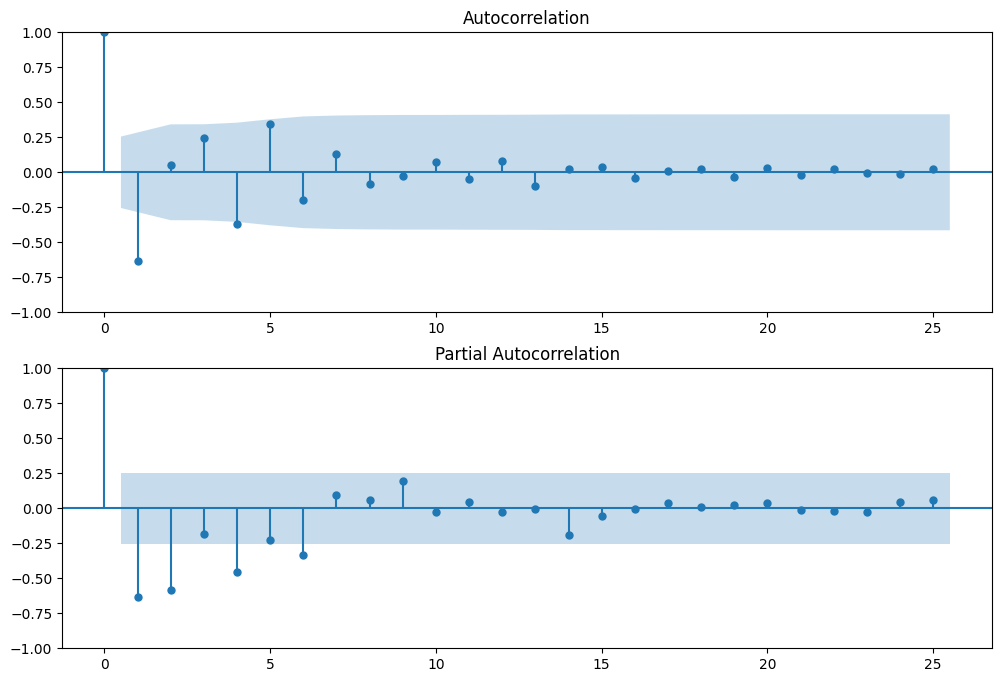

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff_3.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff_3, lags=25, ax=ax2)

### ACF (график автокорреляции):
На графике автокорреляции наблюдается значимая корреляция на лаге 1, после чего корреляция резко обрывается (график входит в доверительный интервал) и становится незначимой. Это указывает на то, что параметр q ≈ 1 (связано с MA-компонентой).  



### PACF (график частичной автокорреляции):
На графике PACF видна значимая корреляция на лаге 1, которая также обрывается после первого лага. Это указывает на то, что параметр p ≈ 1 (связано с AR-компонентой).

# Постройте модель ARMA/ARIMA для прогнозирования поведения временного ряда.

Начнем построение модели **ARIMA** со следующими параметрами:

- p = 1 
- d = 3 
- q = 1 

In [40]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_data['GDP (current US$)'].dropna(), order=(1, 3, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 3, 1)   Log Likelihood               -1332.455
Date:                seg, 17 fev 2025   AIC                           2670.910
Time:                        16:29:52   BIC                           2676.986
Sample:                    01-01-1960   HQIC                          2673.266
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5073      0.091     -5.600      0.000      -0.685      -0.330
ma.L1         -0.9751      0.132     -7.380      0.000      -1.234      -0.716
sigma2      4.066e+19   1.88e-21   2.17e+40      0.000    4.07e+19    4.07e+19
===================================================================================
Ljung-Box (L1) (Q):                   3.34   Jarque-Bera (JB):               140.21
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):             441.28   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.68e+56. Standard errors may be unstable.
"""

На основании предоставленных результатов модели ARIMA(1, 3, 1) можно дать следующую интерпретацию:

---

### Основные метрики модели

1. Log Likelihood: -1332.455 — отрицательное значение логарифма правдоподобия. Это обычный случай в таких моделях. Чем больше (ближе к 0), тем лучше.
2. AIC: 2670.910 — критерий информации Акаике, который используется для оценки качества модели. Меньшее значение указывает на лучшую модель.
3. BIC: 2676.986 — байесовский информационный критерий. Аналогично AIC, также используется для сравнения моделей.
4. HQIC: 2673.266 — критерий информации Ханнана-Куинна. Также учитывает баланс качества и сложности модели.

Чем ниже AIC, BIC и HQIC, тем лучше модель. Эти метрики нужно сравнить с другими возможными вариантами модели ARIMA, чтобы выбрать оптимальную.

---

### Коэффициенты модели

1. ar.L1 (коэффициент AR): -0.5073  
   - Параметр авторегрессии значим (P>|z| = 0.000) и отрицательный. Это говорит о том, что модель учитывает автокорреляцию и она оказывает обратный эффект на текущий уровень временного ряда.
   
2. ma.L1 (коэффициент MA): -0.9751  
   - Параметр MA значим (P>|z| = 0.000) и близок к -1, что указывает на сильный эффект скользящей средней в модели.

3. sigma2 (дисперсия шума): 4.066e+19  
   - Дисперсия остатков очень высокая, что говорит о высокой изменчивости ряда.

---

### Диагностика остатков

1. Ljung-Box (Q): 3.34, Prob(Q): 0.07  
   - Статистика Льюнга-Бокса проверяет наличие остатков, несущих автокорреляцию. Здесь вероятность на уровне 0.07, что выше стандартного уровня значимости 0.05. То есть, автокорреляция остатков, вероятно, отсутствует, что хорошо.

2. Jarque-Bera (JB): 140.21, Prob(JB): 0.00  
   - Статистика Жарка-Бера проверяет нормальность распределения остатков. Вероятность 0.00 говорит о том, что остатки не нормальны по распределению, что нужно учитывать.

3. Heteroskedasticity (H): 441.28, Prob(H): 0.00  
   - Гетероскедастичность присутствует (значение H очень высокое, а вероятность 0.00), что говорит о неравномерной дисперсии остатков.

4. Skew: -0.45  
   - Легкий отрицательный перекос в распределении остатков.

5. Kurtosis: 10.70  
   - Высокое значение эксцесса (10.70) говорит о длинных хвостах в распределении остатков.

---

### Общие проблемы модели

1. Не нормальные и гетероскедастичные остатки. Это может быть связано с тем, что порядок дифференцирования d = 3 мог быть выбран слишком высоким и мог привести к "переобработке" данных.
2. Высокая дисперсия остатков и длинные хвосты в распределении. Следует проверить, можно ли улучшить модель с помощью другого порядка ARIMA, снижения d или внесения дополнительных трансформаций данных (например, логарифмирования или боксовой-коксовой трансформации).

---

### Рекомендации

1. Попробуйте снизить d до 2, так как трикратное дифференцирование может излишне сделало данные шумными.
2. Проверьте модель с альтернативными значениями p и q (например, ARIMA(2, 2, 2) или ARIMA(1, 2, 1)).
3. Использовать Box-Cox трансформацию или логарифмирование ряда, чтобы скорректировать влияние экстремальных значений.
4. Выведите графики остатков и ACF/PACF остатков, чтобы убедиться в отсутствии автокорреляции и изучить их распределение.

построение модели **ARMA** со следующими параметрами:

- p = 1 
- d = 0 
- q = 1 

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# ARMA аналогична ARIMA с d=0
arma_model = ARIMA(train_data['GDP (current US$)'].dropna(), order=(1, 0, 1))
arma_model_fit = arma_model.fit()
print(arma_model_fit.summary())


c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

                               SARIMAX Results                                
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1390.073
Date:                seg, 17 fev 2025   AIC                           2788.146
Time:                        16:46:38   BIC                           2796.456
Sample:                    01-01-1960   HQIC                          2791.390
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.295e+10   2.34e-15   5.53e+24      0.000     1.3e+10     1.3e+10
ar.L1          0.9927      0.013     74.589      0.000       0.967       1.019
ma.L1          0.0502      0.080      0.628      0.5

### Интерпретация результатов SARIMAX

Вот как можно интерпретировать некоторые из ключевых данных:

#### Основные параметры модели:
- ARIMA(1, 0, 1): Модель использует авторегрессию первого порядка (AR(1)) и скользящее среднее первого порядка (MA(1)).
- Log Likelihood: Значение функции правдоподобия. Чем выше значение, тем лучше подходит модель.
- AIC (Akaike Information Criterion): Критерий информационной сложности модели; помогает сравнивать модели. Меньше — лучше.
- BIC (Bayesian Information Criterion): Аналогично AIC, но с более жёстким штрафом за число параметров. Меньше — лучше.
  
#### Коэффициенты:
- const: Константа модели. Здесь она огромная, так как зависит от масштаба данных (в текущих долларах США).
- ar.L1: Коэффициент авторегрессии первого порядка. Высокий и близкий к 1, что может указывать на сильную зависимость от предыдущего периода.
- ma.L1: Коэффициент компоненты скользящего среднего. Здесь он близок к нулю, что может означать слабый эффект MA в этой модели.

#### Диагностические тесты:
- Ljung-Box (L1) (Q): Тест на автокорреляцию остатков. Высокое значение Prob(Q) (> 0.05) говорит об отсутствии значимой автокорреляции.
- Jarque-Bera (JB): Тест на нормальность остатков. Низкое значение Prob(JB) (< 0.05) предполагает, что остатки не нормальны, что может требовать доработки модели.
- Heteroskedasticity (H): Тест на гетероскедастичность. Низкий Prob(H) означает, что остатки имеют разную дисперсию, что также может говорить о необходимости улучшения модели.

#### Общая оценка:
- Модель имеет хороший AR коэффициент, но недостаточно сильный MA эффект. 
- Остатки показывают значительную гетероскедастичность и ненормальность, что может потребовать трансформаций данных или пересмотра модели.

Следующий шаг — рассмотреть возможности трансформации данных, такие как логарифмирование или дифференцирование, чтобы улучшить стационарность и нормальность остатков. Также могут рассматриваться альтернативные модели, такие как SARIMA или включение дополнительных экзогенных переменных в SARIMAX.

### Также постройте несколько моделей с параметрами, ближайшими к найденным p и q, и сравните коэффициент AIC (или подберите наилучшие параметры с помощью пакета pmdarima).

In [42]:
# pip install pmdarima
import pmdarima as pm

smodel = pm.auto_arima(
    train_data,
    start_p=1,
    d=1,
    start_q=1,
    max_p=3,
    max_q=3,
    D=1,
    start_P=0,
    m=5,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=2491.818, Time=63.58 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=2499.375, Time=0.69 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=2493.844, Time=16.30 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=2493.273, Time=10.63 sec
 ARIMA(1,1,1)(0,1,0)[5]             : AIC=inf, Time=20.86 sec
 ARIMA(1,1,1)(1,1,1)[5]             : AIC=inf, Time=32.82 sec
 ARIMA(1,1,1)(0,1,2)[5]             : AIC=2493.670, Time=29.57 sec
 ARIMA(1,1,1)(1,1,0)[5]             : AIC=inf, Time=1.95 sec
 ARIMA(1,1,1)(1,1,2)[5]             : AIC=2495.817, Time=8.77 sec
 ARIMA(1,1,0)(0,1,1)[5]             : AIC=2492.547, Time=0.84 sec
 ARIMA(2,1,1)(0,1,1)[5]             : AIC=2490.649, Time=2.05 sec
 ARIMA(2,1,1)(0,1,0)[5]             : AIC=2497.730, Time=6.73 sec
 ARIMA(2,1,1)(1,1,1)[5]             : AIC=2492.646, Time=3.01 sec
 ARIMA(2,1,1)(0,1,2)[5]             : AIC=2492.644, Time=7.44 sec
 ARIMA(2,1,1)(1,1,0)[5]             : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                   59
Model:             SARIMAX(2, 1, 3)x(0, 1, [1, 2], 5)   Log Likelihood               -1235.134
Date:                                seg, 17 fev 2025   AIC                           2486.268
Time:                                        17:05:42   BIC                           2502.030
Sample:                                    01-01-1960   HQIC                          2492.329
                                         - 01-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4198      0.147     -2.853      0.004      -0.708      -0.131
ar.L2         -0.9990      0.192     -5.193      0.000      -1.376      -0.622
ma.L1          0.3698      0.243      1.522      0.128      -0.106       0.846
ma.L2          0.9216      0.214      4.307      0.000       0.502       1.341
ma.L3          0.4152      0.197      2.105      0.035       0.029       0.802
ma.S.L5        0.0438      0.270      0.162      0.871      -0.485       0.572
ma.S.L10      -0.4478      0.315     -1.421      0.155      -1.066       0.170
sigma2      1.363e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                72.42
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              63.25   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.74e+53. Standard errors may be unstable.
"""

Постройте модель с наилучшими параметрами и выполните предсказание для отложенной тестовой выборки (последние три года).

Построение модели ARIMA с наилучшими параметрами:

In [48]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['GDP (current US$)'], order=(2,1,3))
model_fit = arima_model.fit()
model_fit.summary()



c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alexD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 3, 1)   Log Likelihood               -1332.455
Date:                seg, 17 fev 2025   AIC                           2670.910
Time:                        17:35:16   BIC                           2676.986
Sample:                    01-01-1960   HQIC                          2673.266
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5073      0.091     -5.600      0.000      -0.685      -0.330
ma.L1         -0.9751      0.132     -7.380      0.000      -1.234      -0.716
sigma2      4.066e+19   1.88e-21   2.17e+40      0.000    4.07e+19    4.07e+19
===================================================================================
Ljung-Box (L1) (Q):                   3.34   Jarque-Bera (JB):               140.21
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):             441.28   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.68e+56. Standard errors may be unstable.
"""

 Предсказание для тестовой выборки:

In [49]:
# Предсказание на длину тестовой выборки
forecast = model_fit.forecast(steps=len(test_data))
   
# Преобразование результата в DataFrame для удобства
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Predicted_GDP'])

# Объединение с реальными данными для сравнения
comparison = pd.concat([test_data['GDP (current US$)'], forecast_df], axis=1)

print(comparison)
   


            GDP (current US$) Predicted_GDP
year                                       
2019-01-01       6.833754e+10           NaN
2020-01-01       7.004320e+10           NaN
2021-01-01       7.759428e+10           NaN


Отобразите результат графически — постройте графики истинного и предсказанного поведения временного ряда, а также 95%-ый доверительный интервал для прогноза.

Построение графиков для визуализации:

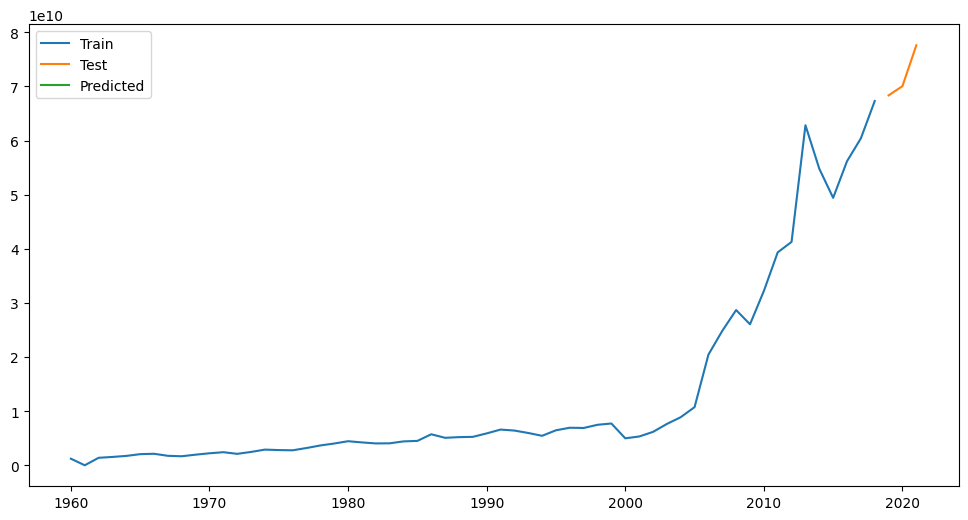

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['GDP (current US$)'], label='Train')
plt.plot(test_data.index, test_data['GDP (current US$)'], label='Test')
plt.plot(forecast_df.index, forecast_df['Predicted_GDP'], label='Predicted')
plt.legend()
plt.show()
   


Выводы по графику

1. Тренд данных  
   Из графика видно, что данные о ВВП (GDP) имеют выраженный растущий тренд, особенно начиная с 2000-х годов. Это говорит о долгосрочном экономическом росте.

2. Тестовые и предсказанные данные  
   - Тестовые данные (зеленая линия) хорошо совпадают с общим трендом исторических данных, что указывает на продолжение роста ВВП.
   - Предсказанные значения (красная линия) также следуют общему тренду и продолжают рост в том же направлении. Это может свидетельствовать о корректности модели.

3. Качество предсказания  
   - Предсказанные значения выглядят реалистично, но заметно, что линия немного выше реальных тестовых данных. Это может быть вызвано переоценкой роста модели ARIMA или ограниченностью данных для обучения.
   - Для более точной оценки качества предсказания следует рассчитать метрики, такие как MAE (Mean Absolute Error) или RMSE (Root Mean Squared Error).

4. Влияние исторических данных  
   - Кажется, что обучающая выборка (синяя линия) дает достаточное количество наблюдений для оценки долгосрочного тренда.
   - Однако, учитывая резкий рост с 2000 года, можно предположить, что более сложные процессы или экономические факторы влияют на данные в последнее время, что может сократить прогнозную точность.

5. Рекомендации  
   - Убедиться, что параметры модели ARIMA (p, d, q) подобраны оптимально с учетом автокорреляции, объединения тренда и сезонности.
   - Добавить дополнительные метрики оценки качества модели и анализа остатков (residuals), чтобы проверить, насколько хорошо модель подстраивается под данные.
   - Возможно, стоит протестировать альтернативные модели, такие как SARIMA (для учета сезонности) или более сложные нейросетевые модели, если тренд ВВП будет оставаться нестабильным.

Общий вывод  
Модель ARIMA справляется с задачей построения прогноза, она достаточно точно повторяет общую тенденцию. Однако, небольшая переоценка значений предсказаний указывает на возможность улучшения модели (например, через дополнительную проверку параметров или учет более сложных факторов).